In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:

ctf = pd.read_excel('CTG.xls',sheetname='Raw Data')

In [58]:
ctf.head(10)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,Fmcs_2.txt,1996-05-03,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Fmcs_2.txt,1996-05-03,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,Hasc_1.txt,1995-02-22,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,1995-02-22,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [55]:
ctf.dtypes

FileName            object
Date        datetime64[ns]
SegFile             object
b                  float64
e                  float64
LBE                float64
LB                 float64
AC                 float64
FM                 float64
UC                 float64
ASTV               float64
MSTV               float64
ALTV               float64
MLTV               float64
DL                 float64
DS                 float64
DP                 float64
DR                 float64
Width              float64
Min                float64
Max                float64
Nmax               float64
Nzeros             float64
Mode               float64
Mean               float64
Median             float64
Variance           float64
Tendency           float64
A                  float64
B                  float64
C                  float64
D                  float64
E                  float64
AD                 float64
DE                 float64
LD                 float64
FS                 float64
S

In [56]:
ctf.isna().count()

FileName    2130
Date        2130
SegFile     2130
b           2130
e           2130
LBE         2130
LB          2130
AC          2130
FM          2130
UC          2130
ASTV        2130
MSTV        2130
ALTV        2130
MLTV        2130
DL          2130
DS          2130
DP          2130
DR          2130
Width       2130
Min         2130
Max         2130
Nmax        2130
Nzeros      2130
Mode        2130
Mean        2130
Median      2130
Variance    2130
Tendency    2130
A           2130
B           2130
C           2130
D           2130
E           2130
AD          2130
DE          2130
LD          2130
FS          2130
SUSP        2130
CLASS       2130
NSP         2130
dtype: int64

In [57]:
ctf.shape

(2130, 40)

In [60]:
ctf = ctf.drop(['FileName','SegFile','Date'],axis=1)

In [61]:
ctf.dropna()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,0.0,953.0,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,240.0,953.0,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,62.0,679.0,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,120.0,779.0,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
10,181.0,1192.0,122.0,122.0,0.0,0.0,3.0,86.0,0.3,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [64]:
ctf = ctf.dropna()

In [66]:
ctf.isna()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
ctf.isna().count()

b           2126
e           2126
LBE         2126
LB          2126
AC          2126
FM          2126
UC          2126
ASTV        2126
MSTV        2126
ALTV        2126
MLTV        2126
DL          2126
DS          2126
DP          2126
DR          2126
Width       2126
Min         2126
Max         2126
Nmax        2126
Nzeros      2126
Mode        2126
Mean        2126
Median      2126
Variance    2126
Tendency    2126
A           2126
B           2126
C           2126
D           2126
E           2126
AD          2126
DE          2126
LD          2126
FS          2126
SUSP        2126
CLASS       2126
NSP         2126
dtype: int64

In [68]:
ctf.isna().sum()

b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

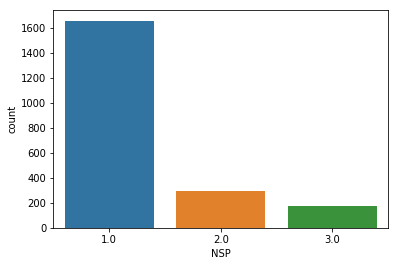

In [88]:
#NSP is the output column
sns.countplot(x='NSP',data=ctf)

In [71]:
indep = ctf['NSP']
dep = ctf.drop(['NSP'],axis=1)

In [75]:
indep.dtypes

dtype('float64')

In [76]:
dep.columns

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS'],
      dtype='object')

In [77]:
x_train,x_test,y_train,y_test = train_test_split(dep,indep,test_size=0.22,random_state=10)

In [79]:
x_train.count()

b           1658
e           1658
LBE         1658
LB          1658
AC          1658
FM          1658
UC          1658
ASTV        1658
MSTV        1658
ALTV        1658
MLTV        1658
DL          1658
DS          1658
DP          1658
DR          1658
Width       1658
Min         1658
Max         1658
Nmax        1658
Nzeros      1658
Mode        1658
Mean        1658
Median      1658
Variance    1658
Tendency    1658
A           1658
B           1658
C           1658
D           1658
E           1658
AD          1658
DE          1658
LD          1658
FS          1658
SUSP        1658
CLASS       1658
dtype: int64

In [80]:
x_test.count()

b           468
e           468
LBE         468
LB          468
AC          468
FM          468
UC          468
ASTV        468
MSTV        468
ALTV        468
MLTV        468
DL          468
DS          468
DP          468
DR          468
Width       468
Min         468
Max         468
Nmax        468
Nzeros      468
Mode        468
Mean        468
Median      468
Variance    468
Tendency    468
A           468
B           468
C           468
D           468
E           468
AD          468
DE          468
LD          468
FS          468
SUSP        468
CLASS       468
dtype: int64

In [81]:
y_train.count()

1658

In [82]:
y_test.count()

468

In [83]:
logreg = LogisticRegression()

In [84]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
pred = logreg.predict(x_test)

In [86]:
pred

array([1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 3.,
       1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 3., 1., 1.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 3., 2., 3., 1., 1., 1.,
       1., 3., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 3.,
       1., 2., 1., 3., 1., 1., 1., 2., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       3., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 3., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [87]:
#Checking accuracy

In [89]:
accuracy_score(pred,y_test)

0.9871794871794872

In [90]:
confusion_matrix(pred,y_test)

array([[368,   4,   0],
       [  2,  60,   0],
       [  0,   0,  34]], dtype=int64)

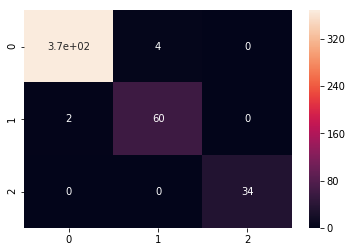

In [93]:
sns.heatmap(data=pd.DataFrame(confusion_matrix(pred,y_test)),annot=True)